# 开普勒三定律

## 开普勒定律的发现  
开普勒定律由三个定律组成$^{[1]}$：  
1. 行星运行在椭圆轨道上，太阳位于椭圆的焦点上  
2. 在椭圆轨道平面上，行星在单位时间划过的面积是相等的  
3. 行星绕太阳公转的周期 T 与公转椭圆轨道的半长轴（长轴的一半）a 满足数量关系： $ T^2 \propto a^3$  


前两个定律由开普勒于 1609 年在《新宇宙学》（Astronomia nova）一书中提出，    
第三定律由开普勒于 1619 年在《宇宙的和谐》（Harmonices Mundi）一书中提出，  
值得注意的是开普勒测量行星与太阳距离的方法$^{[2]}$，结合观测到的角度，可以绘出行星运行的轨道 ,  
另外第三定律的提出过程异常艰辛，开普勒花了 9 年时间分析观测数据，才得出一个统一的结论。  

## 评述：    
高山仰止，开普勒在那么艰苦的环境下，长年坚持不懈地观测、分析、写作，让人不得不为之赞叹，也为自己的怠惰而汗颜。   
从牛顿定律和万有引力定律出发去看开普勒三定律，应该能很方便的理解其内容，下面进行分析。  


首先，论证开普勒定律所描述的内容符合牛顿定律和万有引力定律。

### I. 论证开普勒第一定律符合牛顿定律和万有引力定律

考虑两体之间在万有引力作用下相对运动，问题归结为在牛顿定律和万有引力定律框架下，求出相对运动的轨道。  

万有引力定律：两个质量分别为$m$和$M$的物体，在相对位置为 $\vec{r}$的情况下，会受到来自对方的力  

$$\vec{F}=\frac{GMm}{r^2}\hat{r}$$,
其中 $\hat{r}$ 为指向对方的单位向量。

牛顿定律： $\vec{F}=m\ddot{\vec{r}}$

以 $\vec{r_1},\vec{r_2}$分别表示 $m$和$M$在惯性系中的位置，联立两个方程可得

$$\frac{GMm}{\vert{\vec{r_1}-\vec{r_2}\vert}^3}(\vec{r_1}-\vec{r_2})=-m\ddot{\vec{r_1}}=M\ddot{\vec{r_2}}$$

于是可知 $m\ddot{\vec{r_1}}+M\ddot{\vec{r_2}}=0$,定义质心坐标为 $\Large{\frac{m\vec{r_1}+M\vec{r_2}}{M+m}}$，可以看出质心相对惯性系没有加速度，因此可设质心系为参考系，设质心坐标为 0

即$\Large{\frac{m\vec{r_1}+M\vec{r_2}}{M+m}=0}$，将 $\vec{r_2}$全部替换为$\vec{r_1}$，可得质量为$m$的物体的运动方程为
$$\frac{GM^3}{(M+m)^2}\frac{\vec{r_1}}{{\vert\vec{r_1}\vert}^3}=-\ddot{\vec{r_1}}$$

问题归结为求解这样一个微分方程，只需证明椭圆轨道是该方程的一个解即可。

#### 用差分方法模拟其运行轨道
考虑 $m$ 在固定的 $y_1-y_2$平面上运动，至于为何确定其运动轨道在一个平面内，以后再讨论，设其在平面内的坐标为$(y_1,y_2)$, 质心仍在$(0,0)$点  
令 $C=\frac{GM^3}{(M+m)^2}, y_3 = \dot{y_1}, y_4 = \dot{y_2}$,结合运动方程，可得下面的微分方程
$$
\begin{cases}
\large\dot{y_1} = y_3 \\
\large\dot{y_2} = y_4 \\
\large\dot{y_3} = -C\frac{y_1}{(y_1^2+y_2^2)^{3/2}} \\
\large\dot{y_4} = -C\frac{y_2}{(y_1^2+y_2^2)^{3/2}} \\
\end{cases}
$$
写成差分方程是
\begin{cases}
\large y_1(t_1) = y_1(t_0)+y_3\Delta t \\
\large y_2(t_1) = y_2(t_0)+y_4\Delta t \\
\large y_3(t_1) = y_3(t_0)-C\frac{y_1}{(y_1^2+y_2^2)^{3/2}} \Delta t\\
\large y_4(t_1) = y_4(t_0) -C\frac{y_2}{(y_1^2+y_2^2)^{3/2}} \Delta t\\
\end{cases}
下面利用差分法进行数值模拟

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt

#设置图像大小
#mplt.rcParams['figure.figsize'] = (7,7)
#定义一个生成器来产生新的点
def pointGenerator(initPoint, maxSteps):
    #参数设定
    C = 10
    delta_t = 0.00001
    
    
    n = 0
    point = initPoint
    while n < maxSteps:
        yield point
        delta_1 = point[2]*delta_t
        delta_2 = point[3]*delta_t
        delta_3 = -C*delta_t*point[0]/(point[0]**2+point[1]**2)**(3/2)
        delta_4 = -C*delta_t*point[1]/(point[0]**2+point[1]**2)**(3/2)
        point = np.array([delta_1,delta_2,delta_3,delta_4]) + point
        n = n + 1

#迭代次数
n = 1000000
#初值设定,第 1，2 项为初始位置， 第 3，4 项为初始速度
initialValue = np.array([3,0,0,1.2])
#轨道
pathway = [point for point in pointGenerator(initialValue, n)]

y1Points = [point[0] for point in pathway]
y2Points = [point[1] for point in pathway]

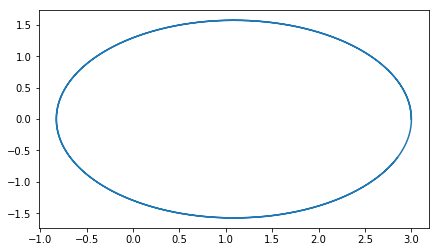

In [98]:
plt.figure(figsize=(7,4))
plt.plot(y1Points,y2Points)
plt.show()

In [25]:
path = pointGenerator(initialValue,4)
next(path)

[3, 5, -2, 4]

In [29]:
next(path)

StopIteration: 

## 参考文献  
[1]  https://en.wikipedia.org/wiki/Astronomia_nova#Kepler's_laws  
[2]  https://baike.baidu.com/item/%E7%BA%A6%E7%BF%B0%E5%B0%BC%E6%96%AF%C2%B7%E5%BC%80%E6%99%AE%E5%8B%92/973574?fr=kg_qa#5_1